In [56]:
import pandas as pd

# Load the dataset
file_path = '/content/bank-full.csv'  # Replace with your file path
raw_data = pd.read_csv(file_path, sep=';')

# Preview the data
print("Dataset Preview:")
print(raw_data.head())

# Dataset Information
print("Dataset Info:")
print(raw_data.info())
output_file_path = 'formatted_bank_data.csv'
raw_data.to_csv(output_file_path, index=False)
print(f"Formatted data saved to {output_file_path}")

Dataset Preview:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data

In [57]:
# Remove unnecessary characters
raw_data = raw_data.replace('"', '', regex=True)

# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if any exist)
raw_data = raw_data.dropna()

print("Cleaned Dataset Preview:")
print(raw_data.head())

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Cleaned Dataset Preview:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may  

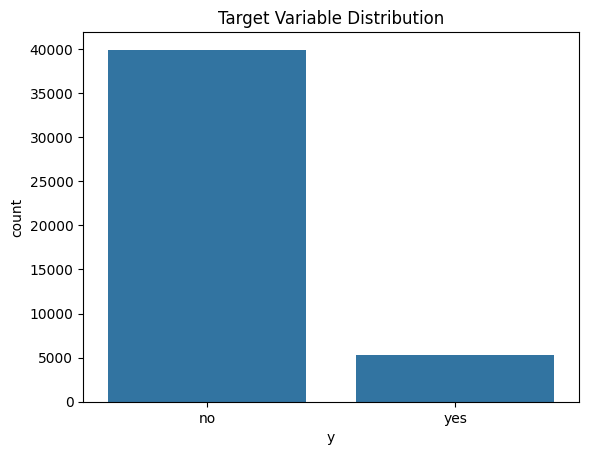

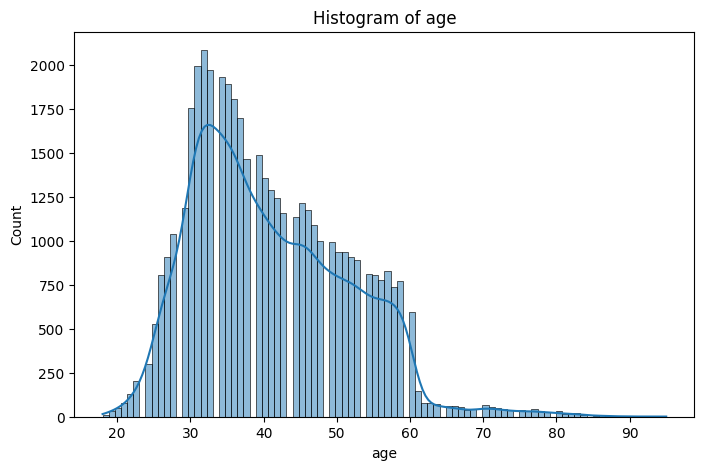

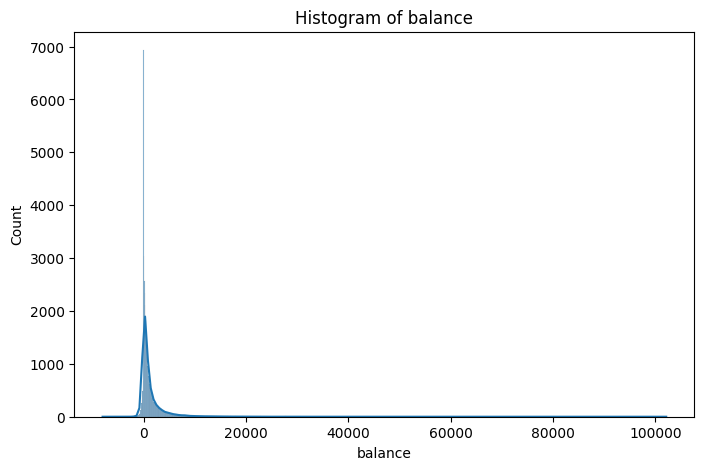

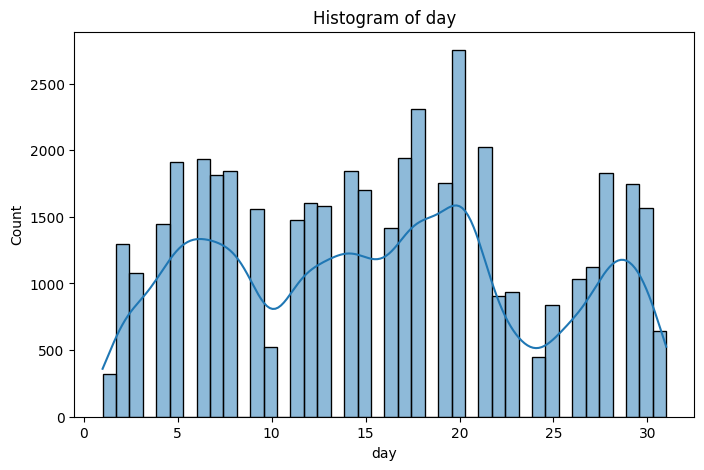

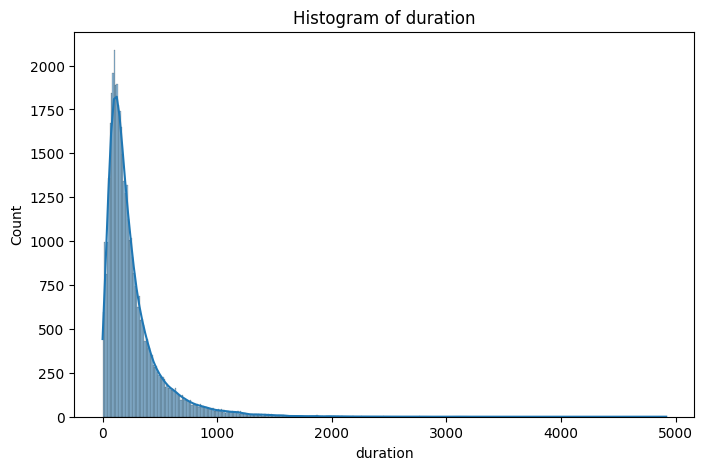

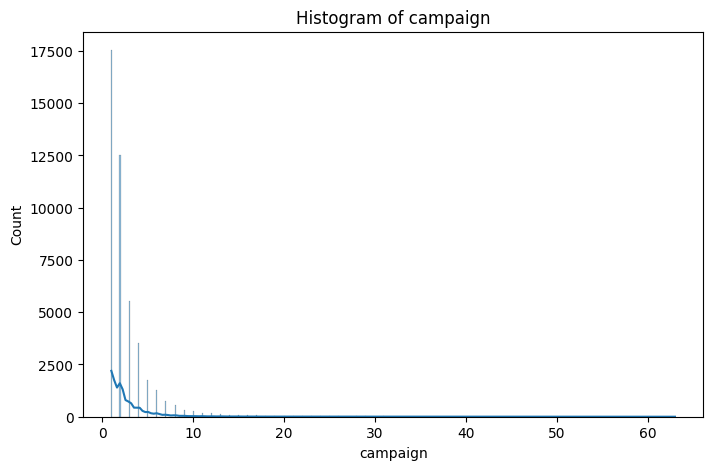

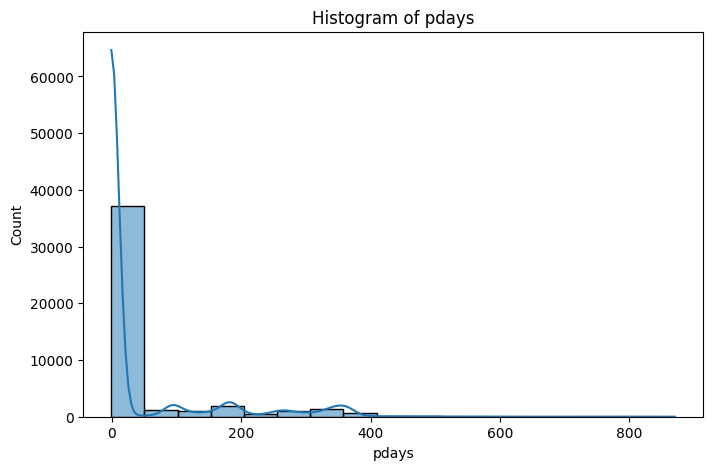

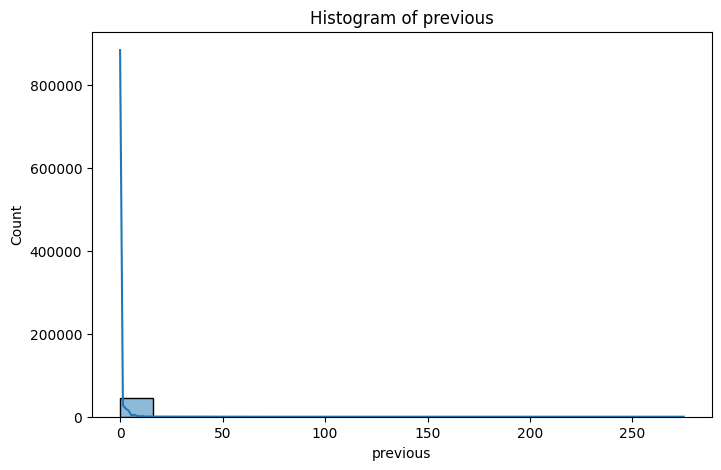

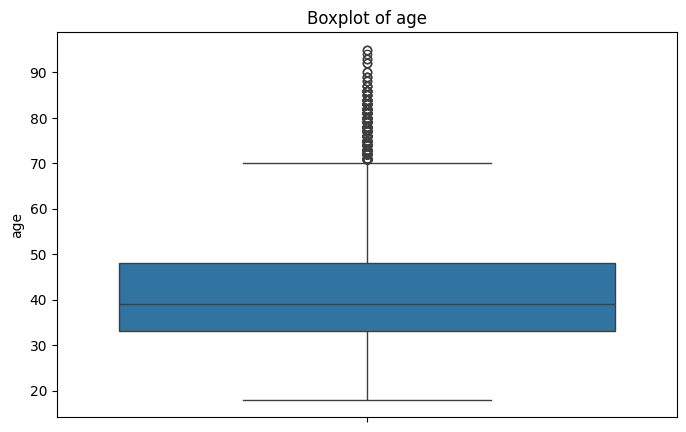

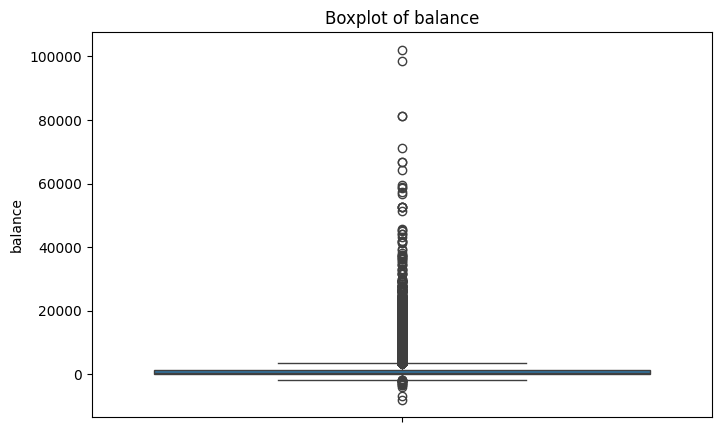

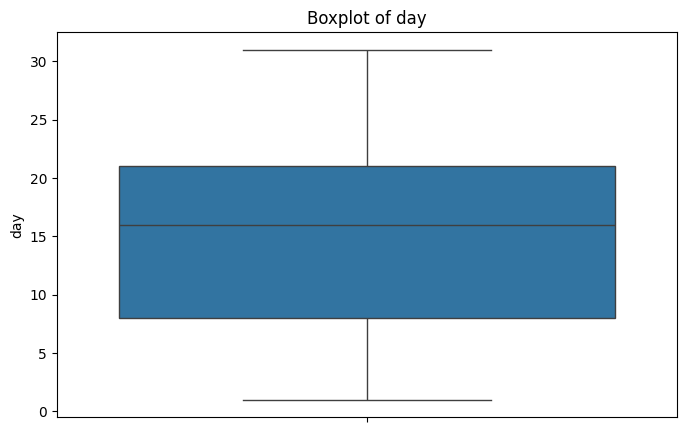

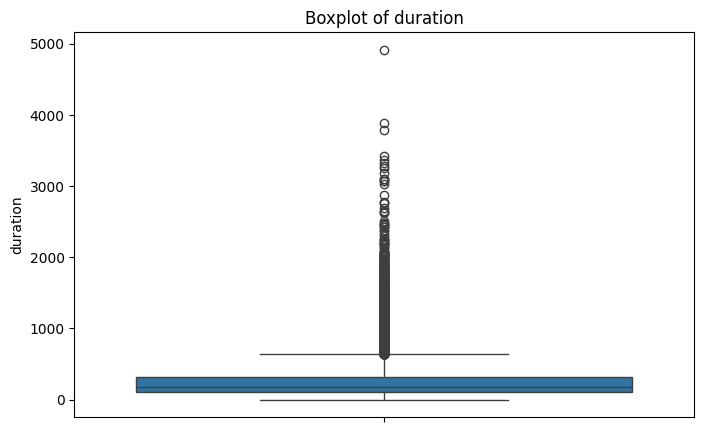

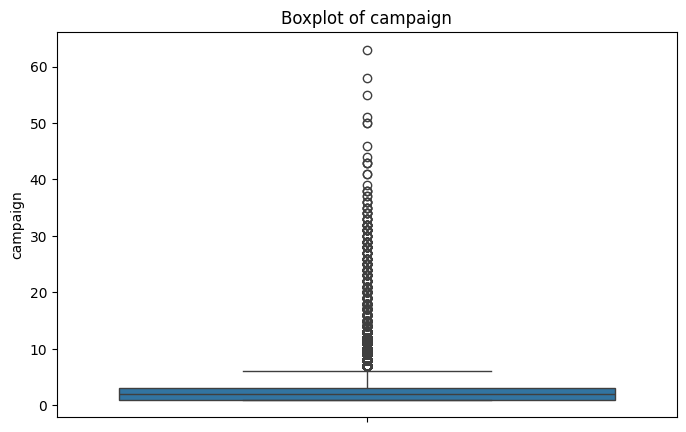

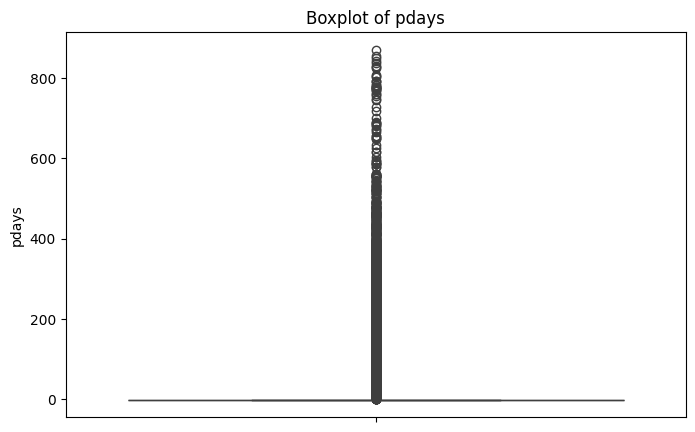

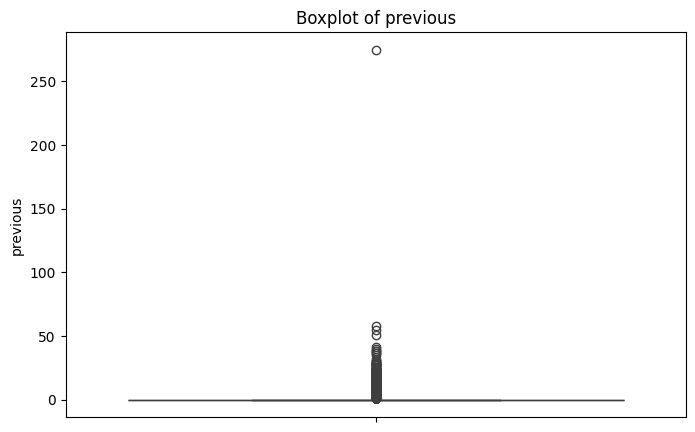

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Target Variable Distribution
sns.countplot(x='y', data=raw_data)
plt.title('Target Variable Distribution')
plt.show()

# Plot Histograms for Numerical Features
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(raw_data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots for Outlier Detection
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=raw_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

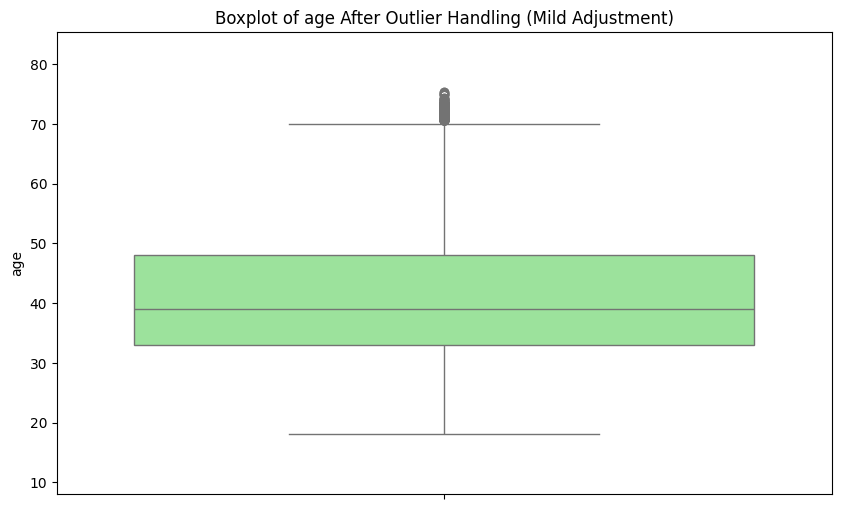

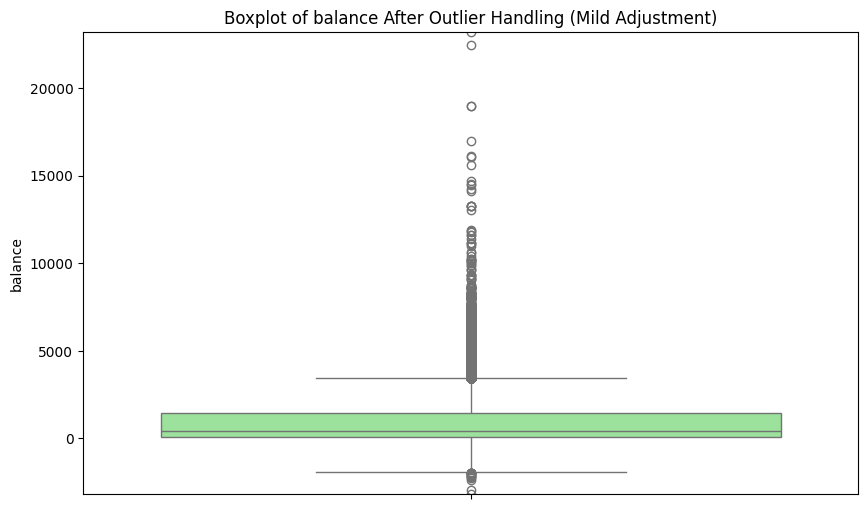

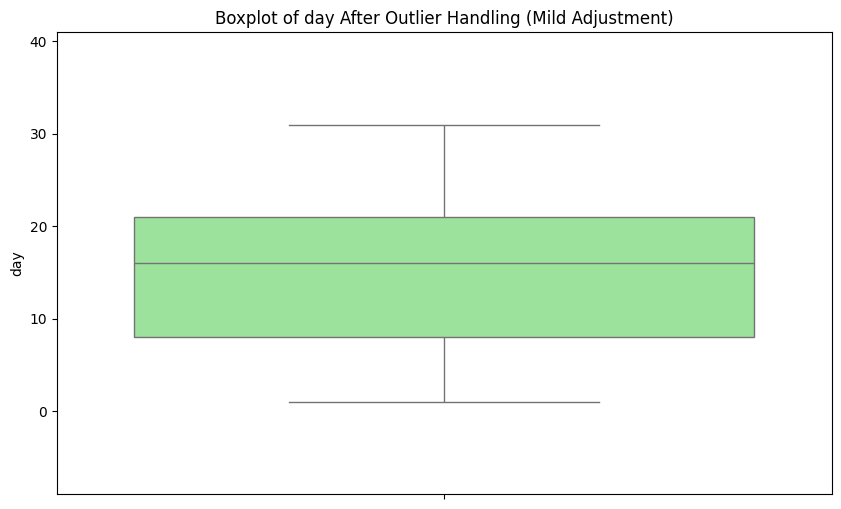

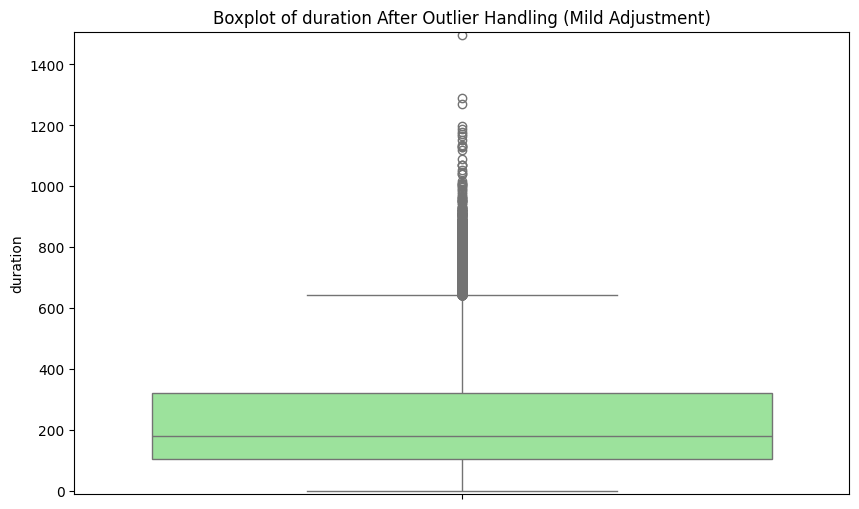

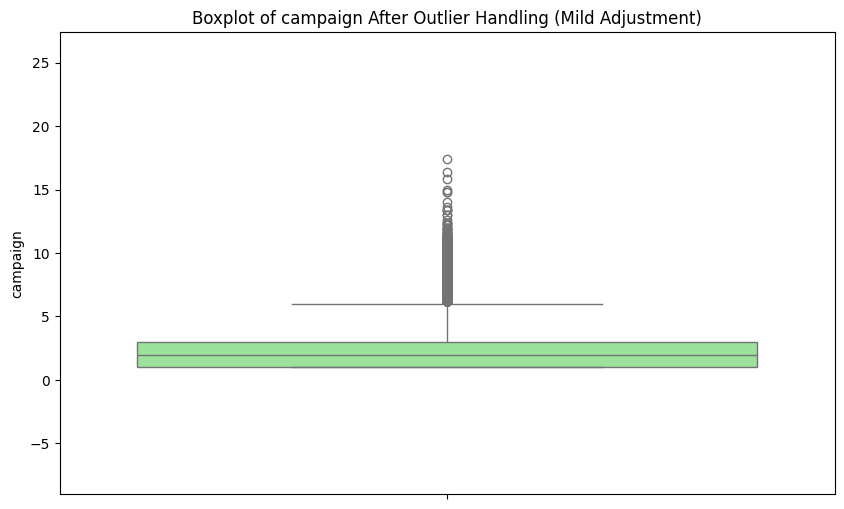

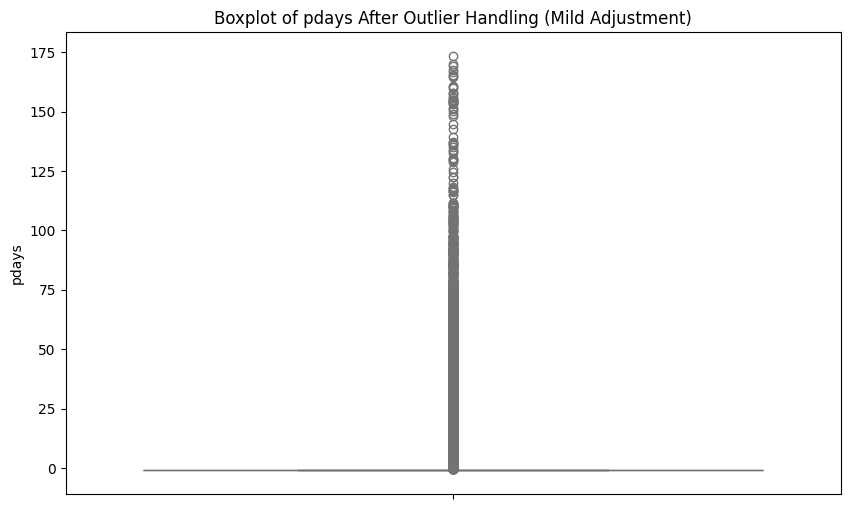

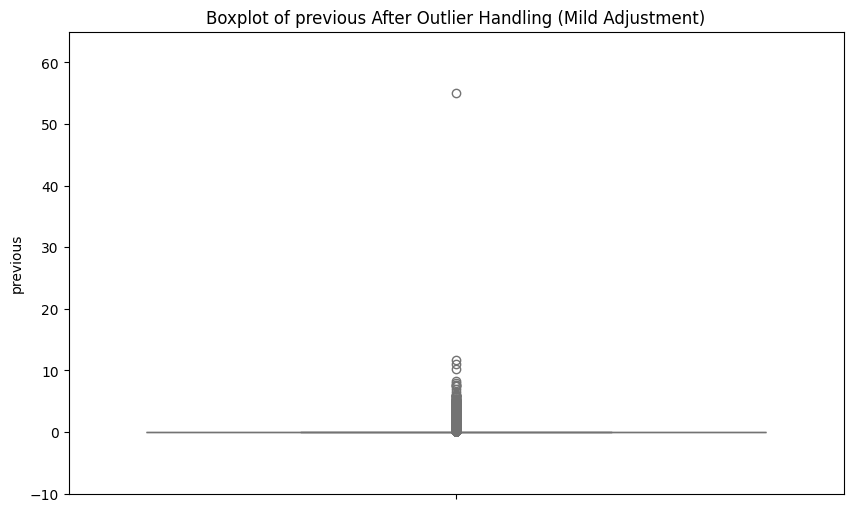

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to adjust outliers
columns_to_adjust = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Function to handle outliers using IQR-based mild adjustment
def handle_outliers_with_dots(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Adjust values slightly closer to the boundary while retaining mild outliers
        df[col] = df[col].apply(
            lambda x: lower_bound + 0.2 * (x - lower_bound) if x < lower_bound
            else (upper_bound - 0.2 * (upper_bound - x) if x > upper_bound else x)
        )
    return df

# Ensure raw_data is a DataFrame with the required columns before applying
try:
    # Apply the function to handle outliers
    raw_data = handle_outliers_with_dots(raw_data, columns_to_adjust)

    # Visualize the adjusted columns using boxplots
    for col in columns_to_adjust:
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=raw_data[col], color='lightgreen')
        plt.title(f"Boxplot of {col} After Outlier Handling (Mild Adjustment)")
        plt.ylabel(col)

        # Adjust Y-axis to reflect adjusted data range
        plt.ylim(raw_data[col].min() - 10, raw_data[col].max() + 10)
        plt.show()
except KeyError as e:
    print(f"Error: Missing column {e} in the dataset. Please check your data.")
except Exception as e:
    print(f"An error occurred: {e}")


In [60]:
# Summary of the column before capping
print("Before Capping:")
print(raw_data['age'].describe())

# Summary of the column after capping
print("After Capping:")
print(raw_data['age'].describe())

# Calculate lower_bound and upper_bound again to use them here
Q1 = raw_data['age'].quantile(0.25)
Q3 = raw_data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Highlight rows where capping would occur
print("Outliers Before Capping:")
print(raw_data[(raw_data['age'] < lower_bound) | (raw_data['age'] > upper_bound)])

Before Capping:
count    45211.000000
mean        40.881790
std         10.434896
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         75.400000
Name: age, dtype: float64
After Capping:
count    45211.000000
mean        40.881790
std         10.434896
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         75.400000
Name: age, dtype: float64
Outliers Before Capping:
        age      job   marital  education default  balance housing loan  \
29158  73.0  retired   married    primary      no    425.0      no   no   
29261  71.4  retired  divorced    primary      no     46.0      no   no   
29263  71.4  retired   married    primary      no   3324.0      no   no   
29322  73.0  retired   married   tertiary      no   4016.8      no   no   
29865  71.4  retired  divorced    primary      no   3545.8     yes   no   
...     ...      ...       ...        ...     ...      ...     ...  ...   
45163  70.6  re

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify Categorical and Numerical Features
categorical_columns = raw_data.select_dtypes(include=['object']).columns.difference(['y'])
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ]
)

# Prepare Features and Target
X = raw_data.drop('y', axis=1)
y = raw_data['y'].map({'yes': 1, 'no': 0})  # Convert target to binary

In [62]:
from sklearn.model_selection import train_test_split

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)



Training Features Shape: (36168, 16)
Testing Features Shape: (9043, 16)


In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply Preprocessing to Training Data
X_train_encoded = preprocessor.fit_transform(X_train)

# SMOTE
print("Class Distribution Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)
print("Class Distribution After SMOTE:", Counter(y_train_smote))

Class Distribution Before SMOTE: Counter({0: 31937, 1: 4231})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class Distribution After SMOTE: Counter({0: 31937, 1: 31937})


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Instantiate and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)  # Initialize the model
rf_model.fit(X_train_smote, y_train_smote)  # Train the model

# Make Predictions
# Apply the preprocessor to the testing data before prediction
X_test_encoded = preprocessor.transform(X_test)
rf_predictions = rf_model.predict(X_test_encoded)

# Evaluate Model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.59      0.55      0.57      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.75      0.76      9043
weighted avg       0.90      0.90      0.90      9043



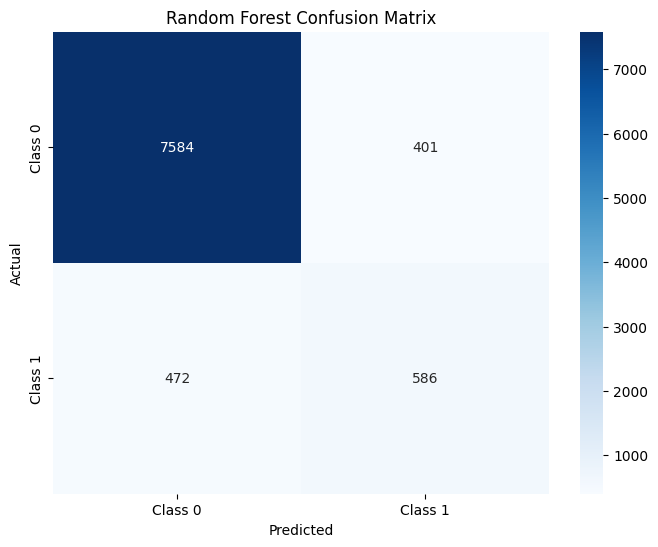

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()



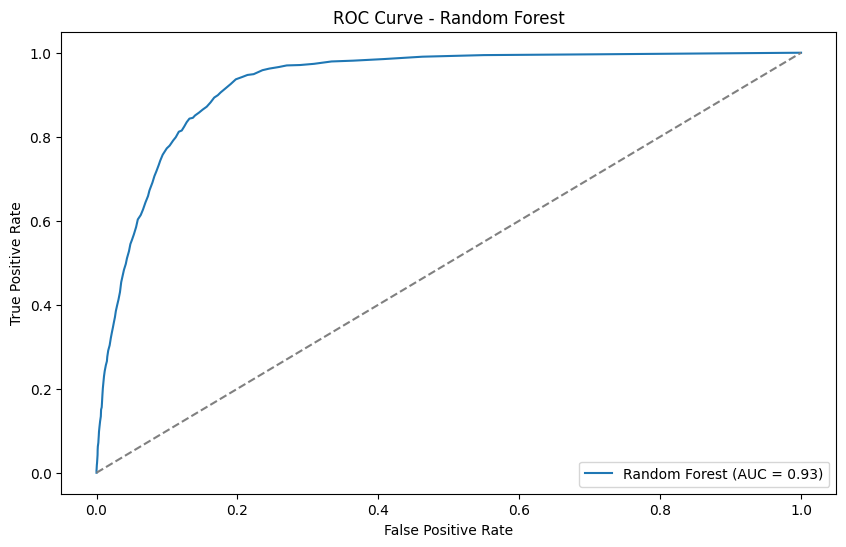

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for ROC curve
rf_probabilities = rf_model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare features and target
X = raw_data.drop('y', axis=1)
y = raw_data['y'].map({'yes': 1, 'no': 0})  # Assuming 'y' is the target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the final pipeline combining preprocessor and classifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.68      0.42      0.52      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.89      0.91      0.90      9043



In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],      # Number of features to consider when looking for the best split
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1',  # Optimize for F1-score
                           cv=5,          # 5-fold cross-validation
                           verbose=2,
                           n_jobs=-1)     # Use all available cores

# Fit the model with GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model on the training data
best_rf = grid_search.best_estimator_

# Make Predictions
rf_predictions_tuned = best_rf.predict(X_test_scaled)

# Evaluate Model
print("Random Forest Classification Report (Tuned):")
print(classification_report(y_test, rf_predictions_tuned))

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, rf_predictions_tuned)
print("Confusion Matrix (Tuned):")
print(cm_tuned)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_smote, y_train_smote)

X_test_encoded = preprocessor.transform(X_test)
nn_predictions = nn_model.predict(X_test_encoded)

# Evaluate Model
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7985
           1       0.47      0.55      0.51      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.74      0.72      9043
weighted avg       0.89      0.88      0.88      9043



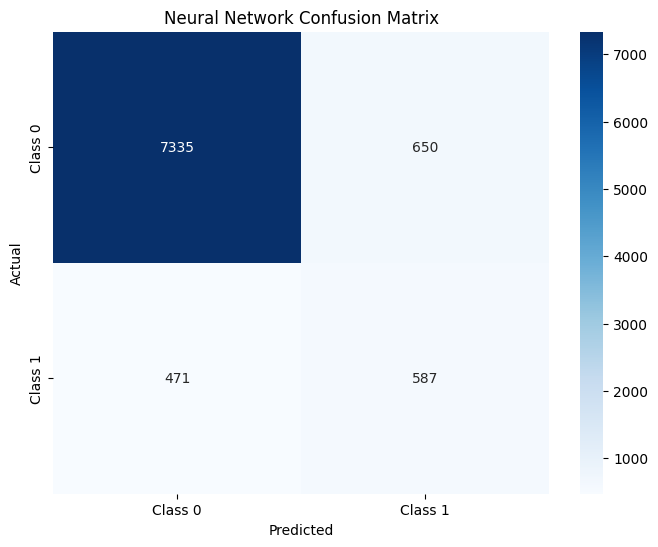

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
nn_cm = confusion_matrix(y_test, nn_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()




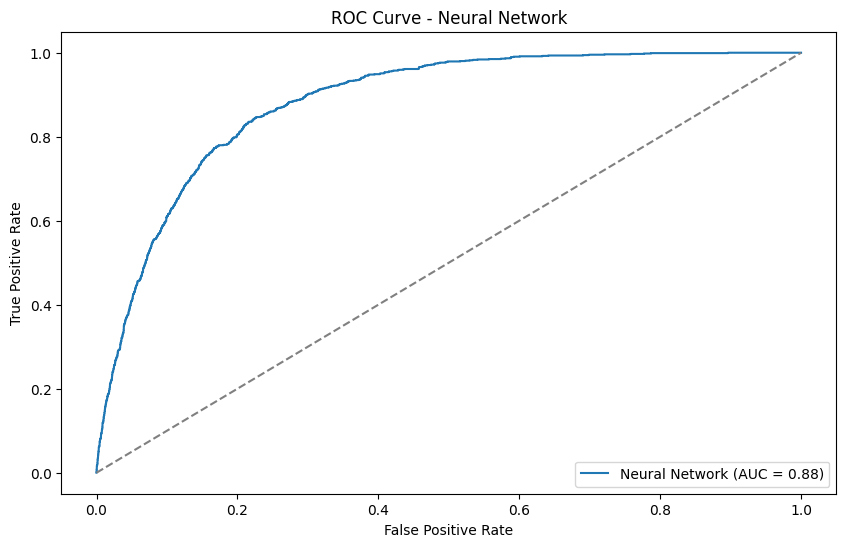

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for ROC curve
nn_probabilities = nn_model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Neural Network Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7952
           1       0.52      0.59      0.55      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.76      0.74      9043
weighted avg       0.89      0.89      0.89      9043



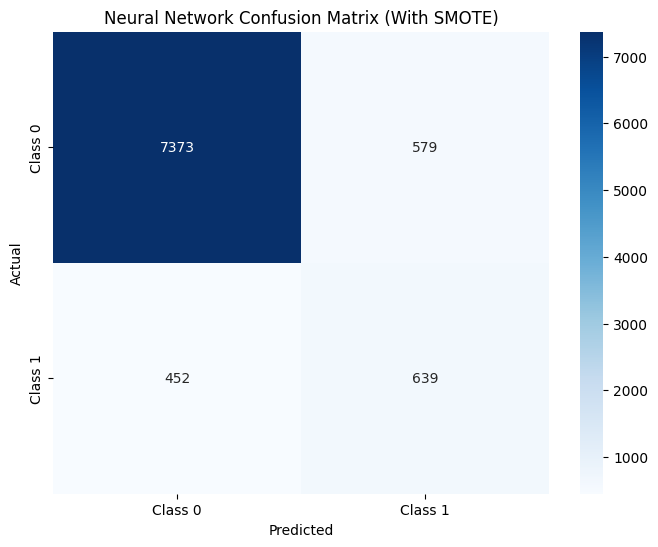

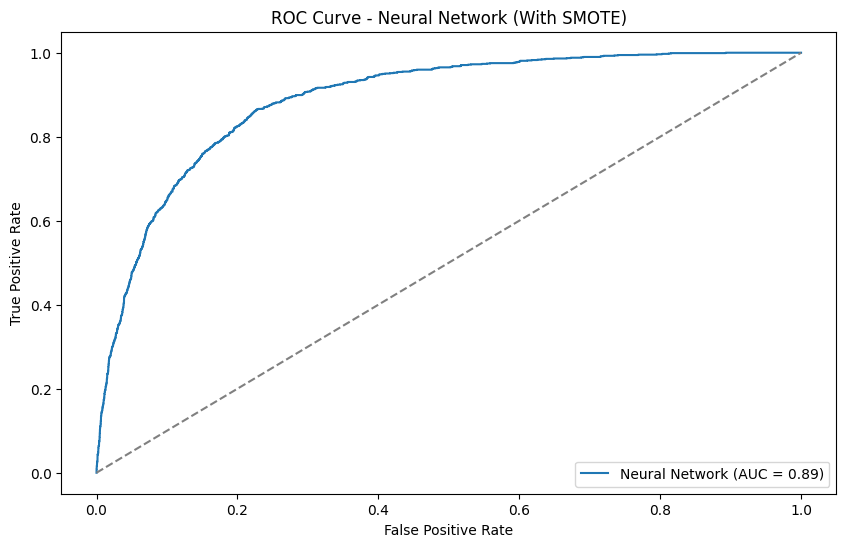

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Identify Categorical and Numerical Features
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ]
)

# Apply Preprocessing to Training and Testing Data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Step 2: Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# Step 3: Train the Neural Network Model
nn_model_balanced = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model_balanced.fit(X_train_smote, y_train_smote)

# Step 4: Make Predictions
nn_predictions_balanced = nn_model_balanced.predict(X_test_preprocessed)

# Step 5: Evaluate Model
print("Neural Network Classification Report (With SMOTE):")
print(classification_report(y_test, nn_predictions_balanced))

# Step 6: Generate and Plot Confusion Matrix
nn_cm_balanced = confusion_matrix(y_test, nn_predictions_balanced)

plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix (With SMOTE)')
plt.show()

# Step 7: ROC Curve and AUC
nn_probabilities_balanced = nn_model_balanced.predict_proba(X_test_preprocessed)[:, 1]
nn_fpr_balanced, nn_tpr_balanced, _ = roc_curve(y_test, nn_probabilities_balanced)
nn_auc_balanced = auc(nn_fpr_balanced, nn_tpr_balanced)

plt.figure(figsize=(10, 6))
plt.plot(nn_fpr_balanced, nn_tpr_balanced, label=f'Neural Network (AUC = {nn_auc_balanced:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (With SMOTE)')
plt.legend(loc='lower right')
plt.show()


Training Neural Network with hidden layers: (50,)


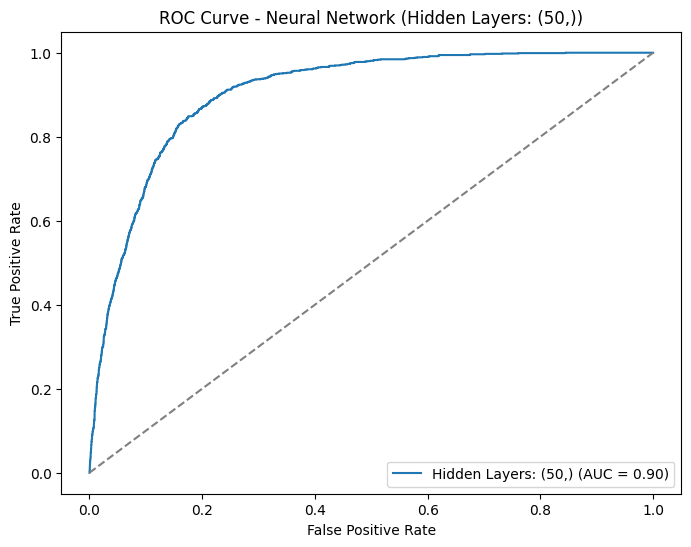

Training Neural Network with hidden layers: (100,)


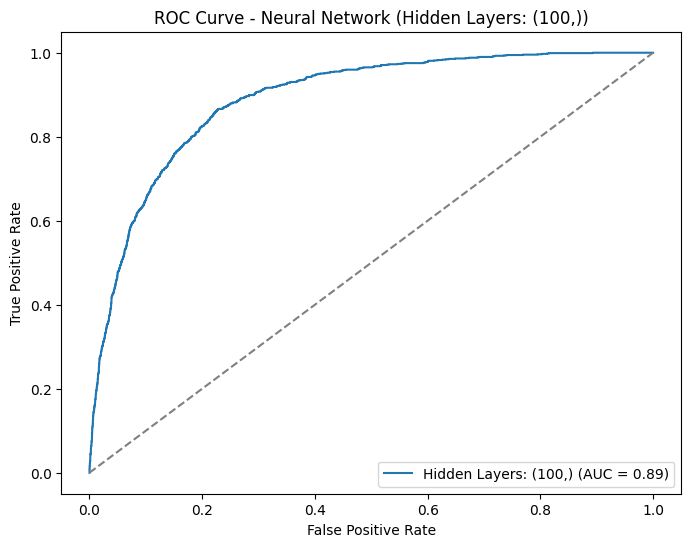

Training Neural Network with hidden layers: (100, 50)


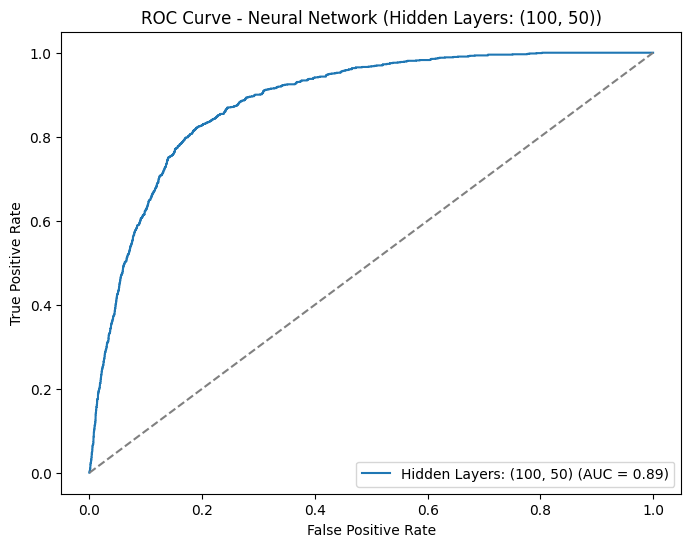

Training Neural Network with hidden layers: (150, 100, 50)


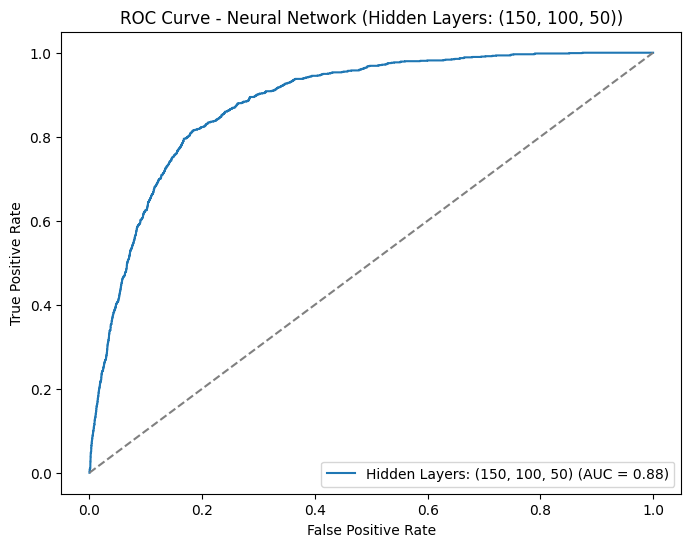

Training Neural Network with hidden layers: (200, 100, 50, 25)


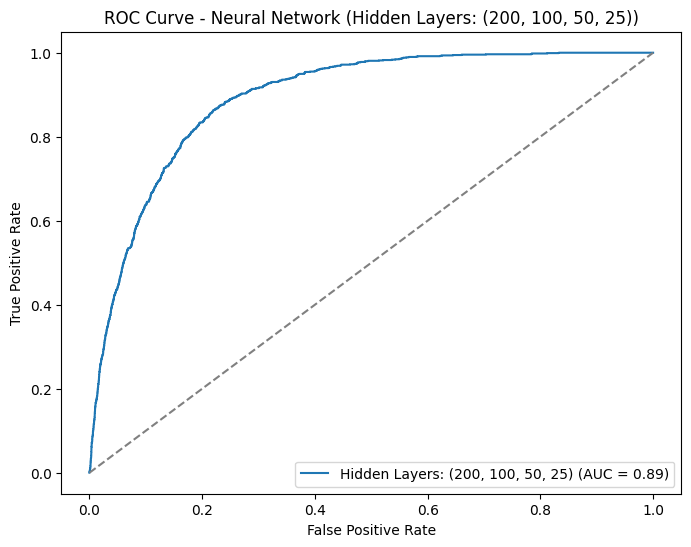

        Hidden Layers  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0               (50,)  0.878027             0.495690          0.632447   
1              (100,)  0.885989             0.524631          0.585701   
2           (100, 50)  0.885436             0.527094          0.490376   
3      (150, 100, 50)  0.875705             0.487119          0.571952   
4  (200, 100, 50, 25)  0.884330             0.520510          0.523373   

   F1-Score (Class 1)       AUC  
0            0.555779  0.904543  
1            0.553486  0.889058  
2            0.508072  0.885035  
3            0.526138  0.883229  
4            0.521938  0.892859  


In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Define configurations for hidden layers
hidden_layer_configs = [
    (50,),                # One hidden layer with 50 neurons
    (100,),               # One hidden layer with 100 neurons
    (100, 50),            # Two hidden layers with 100 and 50 neurons
    (150, 100, 50),       # Three hidden layers with 150, 100, and 50 neurons
    (200, 100, 50, 25)    # Four hidden layers with 200, 100, 50, and 25 neurons
]

# Prepare a DataFrame to store results
results = []

# Loop over different configurations
for hidden_layers in hidden_layer_configs:
    print(f"Training Neural Network with hidden layers: {hidden_layers}")

    # Train the model
    nn_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=500, random_state=42)
    nn_model.fit(X_train_smote, y_train_smote)

    # Make predictions
    nn_predictions = nn_model.predict(X_test_scaled)
    nn_probabilities = nn_model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate metrics
    report = classification_report(y_test, nn_predictions, output_dict=True)
    nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)
    nn_auc = auc(nn_fpr, nn_tpr)

    # Store results
    results.append({
        "Hidden Layers": hidden_layers,
        "Accuracy": report["accuracy"],
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-Score (Class 1)": report["1"]["f1-score"],
        "AUC": nn_auc
    })

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(nn_fpr, nn_tpr, label=f'Hidden Layers: {hidden_layers} (AUC = {nn_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Neural Network (Hidden Layers: {hidden_layers})')
    plt.legend(loc='lower right')
    plt.show()

# Create a DataFrame from the results and display
results_df = pd.DataFrame(results)
print(results_df)


In [79]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

# Split the data into training and validation sets (80/20 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Define the model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Lists to store training and validation accuracy and loss for each epoch
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Training loop
for i in range(1, 501):  # We are running for 500 epochs
    nn_model.max_iter = i  # Update the number of iterations

    # Train the model
    nn_model.fit(X_train_split, y_train_split)

    # Get the predictions for training and validation data
    y_train_pred = nn_model.predict(X_train_split)
    y_val_pred = nn_model.predict(X_val_split)

    # Calculate accuracy for training and validation
    train_accuracy.append(accuracy_score(y_train_split, y_train_pred))
    val_accuracy.append(accuracy_score(y_val_split, y_val_pred))

    # Calculate loss (log_loss) for training and validation
    train_loss.append(log_loss(y_train_split, nn_model.predict_proba(X_train_split)))
    val_loss.append(log_loss(y_val_split, nn_model.predict_proba(X_val_split)))

# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_accuracy, label="Training Accuracy")
plt.plot(range(1, 501), val_accuracy, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_loss, label="Training Loss")
plt.plot(range(1, 501), val_loss, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Train the Neural Network Model (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_smote, y_train_smote)

# Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make Predictions
nn_predictions = nn_model.predict(X_test_encoded)  # Neural Network predictions
rf_predictions = rf_model.predict(X_test_encoded)  # Random Forest predictions

# Calculate Accuracy for both models
nn_accuracy = accuracy_score(y_test, nn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the Accuracy Comparison
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Plotting the Accuracy Comparison
import matplotlib.pyplot as plt

# Data for plotting
models = ['Neural Network', 'Random Forest']
accuracies = [nn_accuracy, rf_accuracy]

# Create a bar plot
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.show()


--------------------------------------

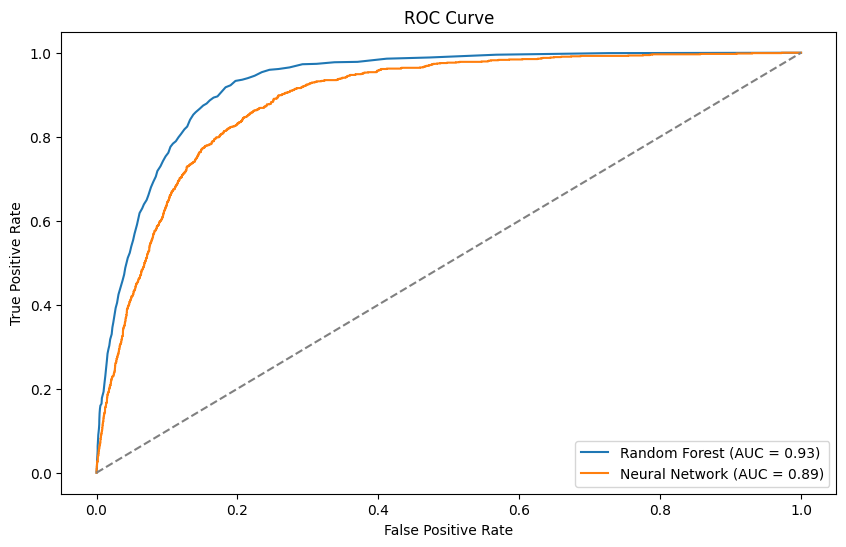

In [ ]:
import matplotlib.pyplot as plt

# Get Probabilities for ROC Curve
# Apply the preprocessor to X_test before prediction
X_test_encoded = preprocessor.transform(X_test)

rf_probabilities = rf_model.predict_proba(X_test_encoded)[:, 1]
nn_probabilities = nn_model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC Curve and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = auc(rf_fpr, rf_tpr)

nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()